# Unsupervised Learnings: Basics

## Clustering

In [1]:
import numpy as np
import matplotlib.pyplot as plt

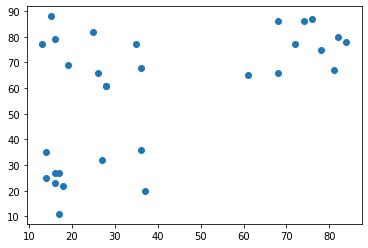

In [2]:
# Pokemon sightings

x_cord = np.concatenate((np.random.randint(10, 40, 10), np.random.randint(60, 90, 10), np.random.randint(10, 40, 10)))
y_cord = np.concatenate((np.random.randint(10, 40, 10), np.random.randint(60, 90, 10), np.random.randint(60, 90, 10)))

plt.scatter(x_cord, y_cord)
plt.show()

## Hierarchial clustering (SciPy)

In [3]:
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
import seaborn as sns
import pandas as pd

In [4]:
df = pd.DataFrame({'x_cord': x_cord, 'y_cord': y_cord})
df.head()

x_cord  y_cord
0      17      27
1      16      23
2      14      35
3      18      22
4      36      36

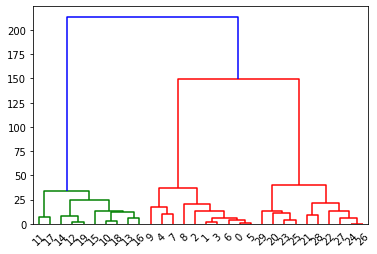

In [5]:
Z = linkage(df, 'ward')
dn = dendrogram(Z)
plt.show()

In [6]:
df['cluster_labels'] = fcluster(Z, 3, criterion='maxclust')
df.head()

x_cord  y_cord  cluster_labels
0      17      27               2
1      16      23               2
2      14      35               2
3      18      22               2
4      36      36               2

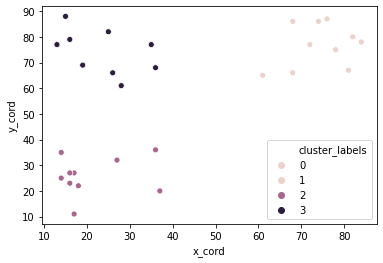

In [7]:
sns.scatterplot(x='x_cord', y='y_cord', hue='cluster_labels', data=df)
plt.show()

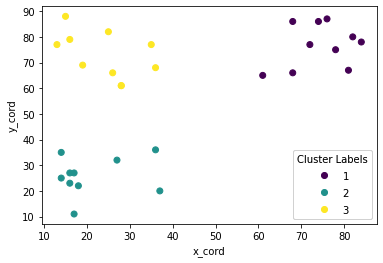

In [8]:
fig, ax = plt.subplots()
scatter = ax.scatter(df.x_cord, df.y_cord, c=df.cluster_labels)

# legends
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower right", title="Cluster Labels")
ax.add_artist(legend1)
ax.set_xlabel('x_cord')
ax.set_ylabel('y_cord')
plt.show()

## K-means clustering (SciPy)

In [9]:
from scipy.cluster.vq import kmeans, vq
np.random.seed(5771)

In [10]:
x_cord = np.concatenate((np.random.random(10) * 30, np.random.random(10) * 90, np.random.random(10) * 30))
y_cord = np.concatenate((np.random.random(10) * 30, np.random.random(10) * 90, np.random.random(10) * 70))
df = pd.DataFrame({'x_cord': x_cord, 'y_cord': y_cord})
centroids, _ = kmeans(df, 3)
df['labels'], _ = vq(df, centroids)

In [11]:
df.head()

x_cord     y_cord  labels
0   8.190942  14.665560       1
1  25.281042  14.988437       1
2  11.983468   2.823589       1
3  12.882285   2.599310       1
4   9.561002   7.644904       1

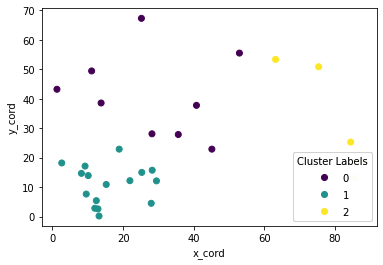

In [12]:
fig, ax = plt.subplots()
scatter = ax.scatter(df.x_cord, df.y_cord, c=df.labels)

# legends
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower right", title="Cluster Labels")
ax.add_artist(legend1)
ax.set_xlabel('x_cord')
ax.set_ylabel('y_cord')
plt.show()

### Normalization of data

In [13]:
from scipy.cluster.vq import whiten

In [14]:
data = np.random.randint(1, 10, 15)
data

array([2, 3, 8, 2, 5, 1, 1, 6, 8, 1, 8, 9, 3, 7, 7])

In [15]:
np.std(data)

2.8859814429217816

In [16]:
scaled_data = whiten(data)
scaled_data

array([0.69300515, 1.03950772, 2.7720206 , 0.69300515, 1.73251287,
       0.34650257, 0.34650257, 2.07901545, 2.7720206 , 0.34650257,
       2.7720206 , 3.11852317, 1.03950772, 2.42551802, 2.42551802])

In [17]:
np.std(scaled_data)

1.0

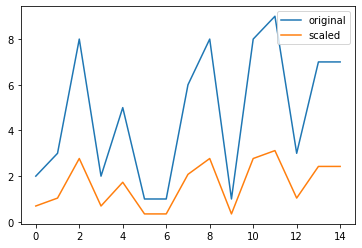

In [18]:
fig, ax = plt.subplots()
ax.plot(data, label='original')
ax.plot(scaled_data, label='scaled')
ax.legend(loc='best', bbox_to_anchor=(0.5, 0.5, 0.5, 0.5))
plt.show()

## Basics of Hierarchial clustering